In [2]:
! pip install -Uqq fastbook

In [3]:
import fastbook
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [7]:
digits = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=parent_label,
    item_tfms=Resize(470),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = digits.dataloaders(path/'training')

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fit(1, 1e-3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.121972,0.094833,0.029250,07:13


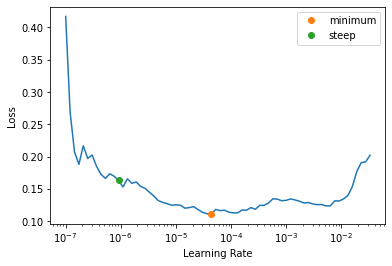

In [11]:
lr_steep, lr_min = learn.lr_find(suggest_funcs=(minimum, steep))

In [12]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 9.12e-07, steepest point: 4.37e-06


In [14]:
learn.fit(1, 9e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.134697,0.083709,0.025667,07:11
